[*********************100%***********************]  4 of 4 completed


Ticker           AAPL       AMZN      GOOGL       MSFT
Date                                                  
2018-01-02  40.524342  59.450500  53.527958  79.633507
2018-01-03  40.517296  60.209999  54.441196  80.004120
2018-01-04  40.705494  60.479500  54.652668  80.708282
2018-01-05  41.168930  61.457001  55.377377  81.708900
2018-01-08  41.016022  62.343498  55.572891  81.792290


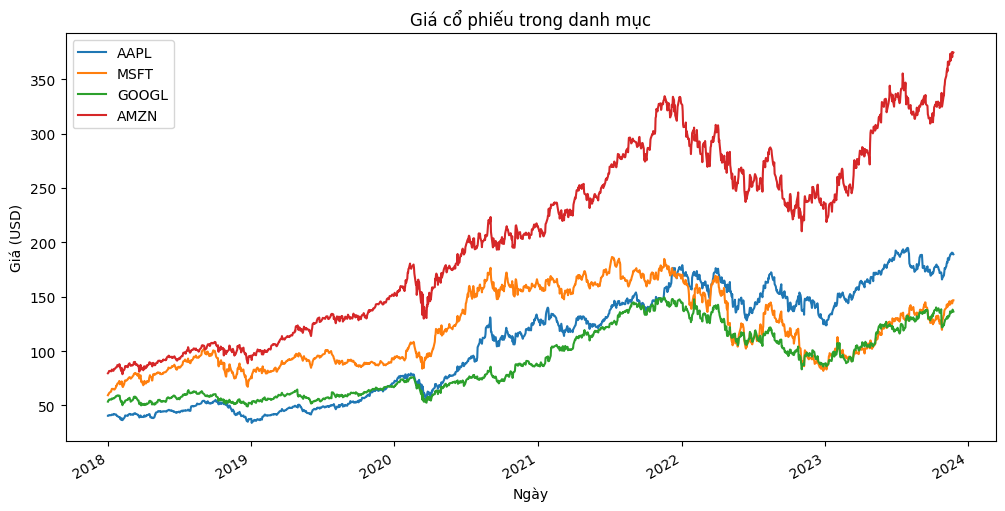

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# danh mục cổ phiếu
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN"]
start_date = "2018-01-01"
end_date = "2023-11-25"

# tải dữ liệu giá cổ phiếu
data = yf.download(stocks, start = start_date, end = end_date)['Adj Close']

# xem dữ liệu
print(data.head())

# trực quan hóa dữ liệu
data.plot(figsize=(12,6), title="Giá cổ phiếu trong danh mục")
plt.xlabel("Ngày")
plt.ylabel("Giá (USD)")
plt.legend(stocks)
plt.show()


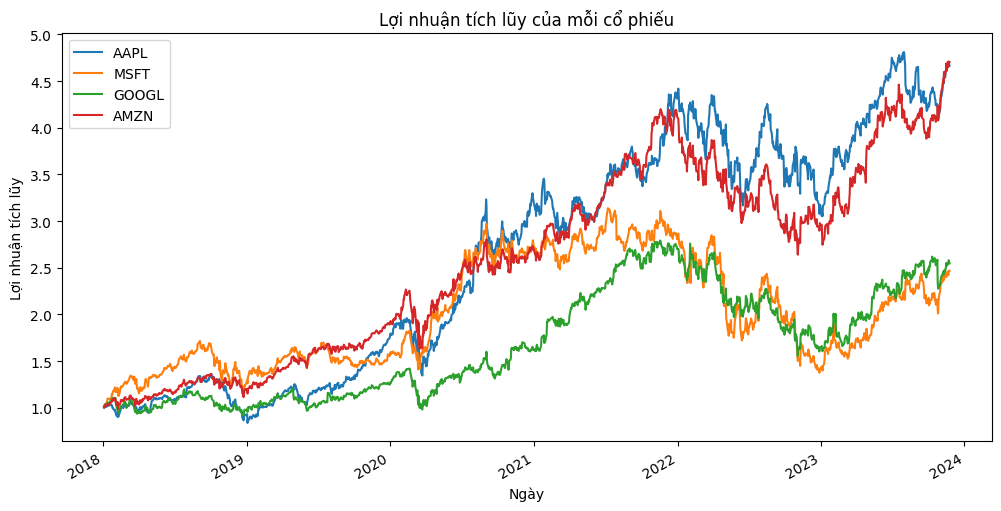

In [6]:
# tính lợi nhuận hàng ngày
daily_returns = data.pct_change().dropna()

# lợi nhuận tích lũy của từng cổ phiếu
cumulative_return = (1+daily_returns).cumprod()

# trực quan hóa lợi nhuận tích lũy
cumulative_return.plot(figsize=(12,6), title="Lợi nhuận tích lũy của mỗi cổ phiếu")
plt.xlabel("Ngày")
plt.ylabel("Lợi nhuận tích lũy")
plt.legend(stocks)
plt.show()

In [7]:
import numpy as np

# giả định tỷ trọng của danh mục là chia đều
weight = np.array([0.25, 0.25, 0.25, 0.25])

# tính lợi nhuận trung bình hàng ngày của danh mục
portfolio_daily_returns = daily_returns.dot(weight)

#lợi nhuận trung bình hàng năm
annual_portfolio_returns = portfolio_daily_returns.mean() * 252

# rủi ro hàng năm
annual_portfolio_volatility = np.sqrt(np.dot(weight.T,np.dot(daily_returns.cov() * 252, weight)))

# sharpe ratio (giả sử lải suất rủi ro 0%)
sharpe_ratio = annual_portfolio_returns/annual_portfolio_volatility

# in kết quả
print(f"Lợi nhuận hàng năm: {annual_portfolio_returns: .2%}")
print(f"Rủi ro hàng năm: {annual_portfolio_volatility: .2%}")
print(f"Sharpe Ritio: {sharpe_ratio: .2f}")

Lợi nhuận hàng năm:  26.16%
Rủi ro hàng năm:  28.36%
Sharpe Ritio:  0.92


[*********************100%***********************]  1 of 1 completed


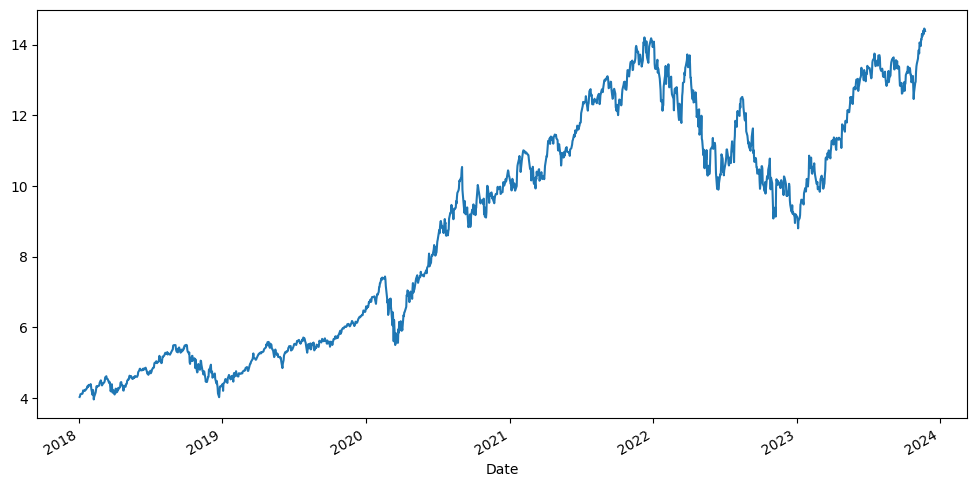

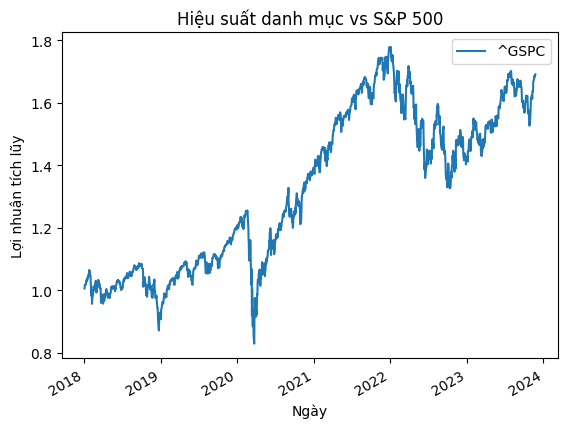

In [15]:
# Tải dữ liệu chỉ số S&P 500
benchmark = yf.download("^GSPC", start=start_date, end=end_date)['Adj Close']

# Tính lợi nhuận tích lũy của chỉ số
benchmark_returns = benchmark.pct_change().dropna()
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()

# Trực quan hóa so sánh
plt.figure(figsize=(12, 6))
cumulative_return.sum(axis=1).plot(label="Portfolio")
benchmark_cumulative_returns.plot(label="S&P 500")
plt.title("Hiệu suất danh mục vs S&P 500")
plt.xlabel("Ngày")
plt.ylabel("Lợi nhuận tích lũy")
plt.legend()
plt.show()


In [20]:
import scipy.optimize as sco

# Hàm tính lợi nhuận và rủi ro
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Hàm tối ưu hóa (Maximize Sharpe Ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    p_returns, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_volatility

# Dữ liệu đầu vào
mean_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252
num_assets = len(stocks)

# Giả định ban đầu
initial_weights = num_assets * [1.0 / num_assets]

# Ràng buộc: Tổng tỷ trọng = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))

# Tối ưu hóa
result = sco.minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Kết quả tối ưu
optimal_weights = result.x
print(f"Tỷ trọng tối ưu: {optimal_weights}")

# Tính lại hiệu suất tối ưu
optimal_return, optimal_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
optimal_sharpe = optimal_return / optimal_risk

print(f"Lợi nhuận tối ưu: {optimal_return:.2%}")
print(f"Rủi ro tối ưu: {optimal_risk:.2%}")
print(f"Sharpe Ratio tối ưu: {optimal_sharpe:.2f}")


Tỷ trọng tối ưu: [4.17979706e-01 1.63931368e-16 0.00000000e+00 5.82020294e-01]
Lợi nhuận tối ưu: 31.05%
Rủi ro tối ưu: 29.02%
Sharpe Ratio tối ưu: 1.07
